#### Install LightRAG


In [1]:
#!pip install neo4j nano_vectordb ollama aioboto3 lightrag-hku 
#!pip install openai langchain-openai transformers torch textract
#!pip install nest_asyncio
#!pip install ragas
#!pip install nltk
#!pip install termcolor

In [2]:
import os, json
#from langchain.chains import AnalyzeDocumentChain
from langchain_openai import ChatOpenAI

from utils import OPENAI_API_KEY

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY 


In [3]:
# Specify the directory
directory = '/home/oleg/SIT/LLM/data/data_rag/conference/'

# List all files in the directory
pdf_files = [f for f in os.listdir(directory) if f.endswith('.pdf')]

# Print PDF file names
#print(pdf_list)
pdf_files = [os.path.join(directory, f) for f in pdf_files]        

In [4]:
import os
from lightrag import LightRAG, QueryParam
from lightrag.llm import gpt_4o_mini_complete, gpt_4o_complete

#########
# Uncomment the below two lines if running in a jupyter notebook to handle the async nature of rag.insert()
# import nest_asyncio
# nest_asyncio.apply()
######### 

WORKING_DIR = "./lightrag_conference"



if not os.path.exists(WORKING_DIR):
    os.mkdir(WORKING_DIR)

rag = LightRAG(
    working_dir=WORKING_DIR,
    chunk_token_size=1000,
    llm_model_func=gpt_4o_mini_complete  # Use gpt_4o_mini_complete LLM model
    # llm_model_func=gpt_4o_complete  # Optionally, use a stronger model
)

INFO:lightrag:Logger initialized for working directory: ./lightrag_conference
INFO:lightrag:Load KV full_docs with 0 data
INFO:lightrag:Load KV text_chunks with 0 data
INFO:lightrag:Load KV llm_response_cache with 0 data
INFO:nano-vectordb:Init {'embedding_dim': 1536, 'metric': 'cosine', 'storage_file': './lightrag_conference/vdb_entities.json'} 0 data
INFO:nano-vectordb:Init {'embedding_dim': 1536, 'metric': 'cosine', 'storage_file': './lightrag_conference/vdb_relationships.json'} 0 data
INFO:nano-vectordb:Init {'embedding_dim': 1536, 'metric': 'cosine', 'storage_file': './lightrag_conference/vdb_chunks.json'} 0 data


In [5]:
import time
import textract
import nest_asyncio
nest_asyncio.apply()


In [6]:
times = []
for pdf in pdf_files:
    t0 = time.time()
    text_content = textract.process(pdf)
    rag.insert(text_content.decode('utf-8'))
    times.append(time.time() - t0)

INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 24 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 24 nodes, 15 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 14 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 36 nodes, 22 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 43 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 25 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 77 nodes, 46 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 14 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 6 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 90 nodes, 51 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 21 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 109 nodes, 63 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 61 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 32 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 166 nodes, 94 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 15 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 10 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 179 nodes, 103 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 28 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 205 nodes, 123 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 22 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 5 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 225 nodes, 128 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 13 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 236 nodes, 138 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 62 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 295 nodes, 148 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 16 entities(duplicated), 9 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 16 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 9 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 308 nodes, 156 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 322 nodes, 166 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 12 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 332 nodes, 173 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 42 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 371 nodes, 187 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 44 entities(duplicated), 18 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 42 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 407 nodes, 203 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 15 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 421 nodes, 215 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 24 entities(duplicated), 13 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 22 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 436 nodes, 226 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/cha

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 42 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 22 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 471 nodes, 247 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 22 entities(duplicated), 15 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 22 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 491 nodes, 261 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 33 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 26 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 520 nodes, 286 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 14 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 532 nodes, 296 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 22 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 554 nodes, 307 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:openai._base_client:Retrying request to /embeddings in 0.386984 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 20 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 572 nodes, 319 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 25 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 7 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 592 nodes, 325 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 30 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 14 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 620 nodes, 338 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠸ Processed 3 chunks, 48 entities(duplicated), 10 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 46 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 10 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 662 nodes, 347 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 12 entities(duplicated), 9 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to entities
INFO:openai._base_client:Retrying request to /embeddings in 0.441164 seconds
INFO:openai._base_client:Retrying request to /embeddings in 0.875419 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 9 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 672 nodes, 355 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

⠙ Processed 1 chunks, 18 entities(duplicated), 5 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 18 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 5 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 685 nodes, 358 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 7 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 3 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 688 nodes, 359 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 34 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 711 nodes, 378 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 33 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 738 nodes, 393 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 43 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 778 nodes, 403 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 15 entities(duplicated), 13 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 791 nodes, 415 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:openai._base_client:Retrying request to /chat/completions in 0.432904 seconds
INFO:openai._base_client:Retrying request to /chat/completions in 0.906016 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "H

INFO:lightrag:Inserting 24 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 6 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 812 nodes, 420 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 18 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 6 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 825 nodes, 425 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 18 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 838 nodes, 435 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠸ Processed 3 chunks, 70 entities(duplicated), 31 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 54 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 30 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 888 nodes, 464 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/comp

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 40 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 925 nodes, 475 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 6 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 937 nodes, 480 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 24 entities(duplicated), 17 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 24 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 958 nodes, 496 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 25 entities(duplicated), 19 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 25 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 19 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 981 nodes, 514 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 28 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 14 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1006 nodes, 528 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 28 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1027 nodes, 540 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:openai._base_client:Retrying request to /chat/completions in 0.490795 seconds
INFO:openai._base_client:Retrying request to /chat/completions in 0.764344 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 25 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 20 vectors to relationships
INFO:openai._base_client:Retrying request to /embeddings in 0.378927 seconds
INFO:openai._base_client:Retrying request to /embeddings in 0.769348 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1045 nodes, 559 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 21 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1063 nodes, 566 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 34 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1090 nodes, 585 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 14 entities(duplicated), 3 relations(duplicated)


INFO:openai._base_client:Retrying request to /chat/completions in 0.415912 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 14 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 3 vectors to relationships
INFO:openai._base_client:Retrying request to /embeddings in 0.381469 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1101 nodes, 587 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.

INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1113 nodes, 598 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 19 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1129 nodes, 610 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 21 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1146 nodes, 626 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 9 entities(duplicated), 7 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 9 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 7 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1152 nodes, 632 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 28 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1175 nodes, 643 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 8 entities(duplicated), 7 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 7 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1181 nodes, 649 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 47 entities(duplicated), 22 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 43 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1219 nodes, 669 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 19 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1232 nodes, 683 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 36 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 10 vectors to relationships
INFO:openai._base_client:Retrying request to /embeddings in 0.422039 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1253 nodes, 685 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠸ Processed 3 chunks, 55 entities(duplicated), 14 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 51 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1297 nodes, 697 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 20 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 3 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1314 nodes, 699 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 12 entities(duplicated), 9 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 9 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1323 nodes, 707 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 40 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 18 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1358 nodes, 724 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 19 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 3 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1374 nodes, 726 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 19 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:openai._base_client:Retrying request to /embeddings in 0.461304 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1388 nodes, 742 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 65 entities(duplicated), 12 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 63 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 11 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1444 nodes, 752 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/com

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 48 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1482 nodes, 771 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 24 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1500 nodes, 781 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:openai._base_client:Retrying request to /chat/completions in 0.438115 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 32 entities(duplicated), 18 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 32 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 18 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1525 nodes, 798 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠸ Processed 3 chunks, 43 entities(duplicated), 25 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 37 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 23 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1559 nodes, 820 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:openai._base_client:Retrying request to /chat/completions i

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 43 entities(duplicated), 7 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 41 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 6 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1593 nodes, 825 edges
INFO:lightrag:Writing graph with 1593 nodes, 825 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 16 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 10 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1601 nodes, 833 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 37 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1636 nodes, 846 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:openai._base_client:Retrying request to /chat/completions in 0.498766 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 85 vectors to entities


INFO:openai._base_client:Retrying request to /embeddings in 0.442622 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 32 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1708 nodes, 877 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 20 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1725 nodes, 893 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 50 entities(duplicated), 14 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 48 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1774 nodes, 905 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/com

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 50 entities(duplicated), 16 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 47 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 15 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1817 nodes, 919 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:openai._base_client:Retrying request to /chat/completions i

INFO:lightrag:Inserting 25 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 12 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1838 nodes, 930 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 3 chunks
INFO:lightrag:Inserting 3 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 58 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 35 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1879 nodes, 963 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 16 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1893 nodes, 970 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠙ Processed 1 chunks, 21 entities(duplicated), 19 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 21 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 19 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1905 nodes, 987 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 15 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 5 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1915 nodes, 991 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 14 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1926 nodes, 1005 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 51 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 18 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1975 nodes, 1022 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 16 vectors to entities


INFO:openai._base_client:Retrying request to /embeddings in 0.412560 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 4 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 1986 nodes, 1025 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 103 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 26 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2078 nodes, 1050 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST h

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


⠹ Processed 2 chunks, 35 entities(duplicated), 17 relations(duplicated)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 35 vectors to entities
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2093 nodes, 1063 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/co

INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 8 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2106 nodes, 1070 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 3 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2119 nodes, 1072 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 2 chunks
INFO:lightrag:Inserting 2 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 45 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 17 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2155 nodes, 1088 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:openai._base_client:Retrying request to /embeddings in 0.380392 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 16 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 13 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2167 nodes, 1101 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 17 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 9 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2178 nodes, 1109 edges
INFO:lightrag:[New Docs] inserting 1 docs
INFO:lightrag:[New Chunks] inserting 1 chunks
INFO:lightrag:Inserting 1 vectors to chunks
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:[Entity Extraction]...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:lightrag:Inserting 16 vectors to entities


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Inserting 5 vectors to relationships
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Writing graph with 2189 nodes, 1113 edges


In [24]:
import numpy as np
n_pdf = len(pdf_files)
s_time = sum(times)
print(f"Number of pdf files:{n_pdf} Summary time: {round(s_time,1)} Mean time: {round(s_time/n_pdf,1)} Median {round(np.median(times),1)}")

Number of pdf files:92 Summary time: 3450.4 Mean time: 37.5 Median 29.7


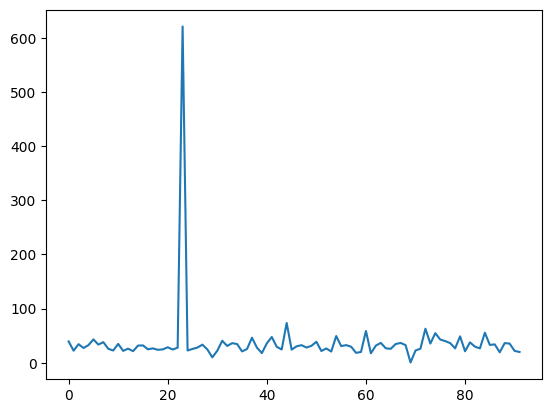

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(times)
plt.show()

In [9]:
import networkx as nx
from pyvis.network import Network

# Load the GraphML file
G = nx.read_graphml('./lightrag_conference/graph_chunk_entity_relation.graphml')

# Create a Pyvis network
net = Network(notebook=True)

# Convert NetworkX graph to Pyvis network
net.from_nx(G)

# Save and display the network
net.show('knowledge_graph.html')

knowledge_graph.html


### Inference

In [10]:
from termcolor import colored
mode = "local"
top_k = 10

In [11]:
q = "Is there K.Novoselov and N.Kazeev article?"
answer = rag.query(q, param=QueryParam(mode=mode, top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 6 relations, 7 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Is there K.Novoselov and N.Kazeev article?
It appears there is a mention of **Kostya S. Novoselov**, a renowned researcher at the National University of Singapore, known for his work in 2D materials and condensed matter physics. However, there is no record of a publication or collaboration involving an author named **N. Kazeev** in the provided data tables.

The references mention several co-authors and collaborators in the field of materials science, including **K. Nogajewski**, who is specifically noted as a co-author of research on single photon emitters in WSe2 structures, but it does not connect K. Novoselov with N. Kazeev.

If you are looking for a specific article co-authored by K. Novoselov and N. Kazeev, it might be necessary to consult academic databases or journals directly, as the current dataset does not provide that information. Let me know if you need assistance with anything else!


In [12]:
q = "Is there N.Kazeev article?"
answer = rag.query(q, param=QueryParam(mode=mode, top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 14 relations, 8 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Is there N.Kazeev article?
### Overview of N. Kazeev's Work

Nikita Kazeev is a prominent researcher affiliated with the Institute for Functional Intelligent Materials, recognized for his contributions to materials science, particularly within the realm of crystal generation using machine learning. He is one of the primary researchers involved in the development of the WyckoffTransformer model, which aims to enhance the design and understanding of crystalline materials.

### Published Research and Contributions

Kazeev's notable work includes the article titled **“WyckoffTransformer: Autoregressive Generation of Crystals,”** which was presented at the AI4AM2024 conference held in Barcelona, Spain, from July 2-4, 2024. This article outlines innovative strategies for generating stable crystals through a machine learning framework, thereby facilitating advancements in material design. The focus of the WyckoffTransformer model is to appropriately account for the internal symmetries found i

In [13]:
q = "What is the main in K.Novoselov article?"
answer = rag.query(q, param=QueryParam(mode=mode, top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 9 relations, 8 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


What is the main in K.Novoselov article?
The K. Novoselov article primarily explores advancements in material science, particularly focused on π-conjugated materials and their applications in organic electronics. A key emphasis is placed on the study and characterization of two-dimensional (2D) materials, addressing their electronic properties and the implications these have for innovative technological applications.

### Main Themes and Objectives

1. **Characterization of Defects and Properties**:
   The article discusses the characterization of point defects in liquid-phase exfoliated materials like PtSe2. Point defects can significantly affect the properties of 2D materials, sometimes even inducing new functionalities like magnetism. Techniques such as Aberration-corrected Scanning Transmission Electron Microscopy (STEM) are highlighted for their role in observing defects, with a focus on the validation of experimental results through simulations.

2. **Machine Learning Integration

In [18]:
q = "where does a bear live?"
answer = rag.query(q, param=QueryParam(mode=mode, top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 2 entites, 2 relations, 2 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


where does a bear live?
Bears are mammals found in various habitats across the world, primarily in North America, Europe, and Asia. The geographical distribution of bear species varies significantly, and they can be found in forests, mountains, tundra, and sometimes even in coastal areas.

**Habitat Preferences**  
1. **Grizzly Bears**: These bears inhabit a range of environments including forests, mountainous regions, and tundra. They are commonly found in North America, specifically in Canada and Alaska.
  
2. **Polar Bears**: Found in the Arctic regions, polar bears live primarily on the sea ice covering the Arctic Ocean, as well as along coastlines and sometimes on the ice over freshwater lakes and rivers.

3. **Black Bears**: These bears prefer wooded areas and are adaptable to various environments, from dense forests to suburban areas. They are primarily found in North America.

4. **Panda Bears**: Unique to China, giant pandas inhabit mountainous regions and are primarily locate

In [19]:
q = "where does a bear live?"
answer = rag.query(q, param=QueryParam(mode='hybrid', top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 2 entites, 2 relations, 2 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Global query uses 18 entites, 10 relations, 5 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


where does a bear live?
Bears are found in a variety of habitats across the globe, depending on the species. Generally, they inhabit forested areas, mountains, tundra, and even coastal regions. 

### Types of Bear Habitats

1. **Forests**: Many species of bears, such as black bears and brown bears, thrive in forested environments. These areas provide ample food sources, such as berries, fruits, nuts, and plant roots, as well as shelter and denning sites. 

2. **Mountains**: Bears often inhabit mountainous regions where they can find steep terrains and rocky caves. These habitats are particularly important for species like the grizzly bear, who enjoy the secluded areas that offer both food and safety.

3. **Tundra**: In North America, polar bears are categorized under the tundra biome, where they hunt for seals on sea ice. Their adaptations to cold climates make them uniquely suited for life in these harsh conditions.

4. **Coastal Regions**: Some bears, such as coastal brown bears (gri

In [20]:
q = "where does a bear live?"
answer = rag.query(q, param=QueryParam(mode='global', top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Global query uses 18 entites, 10 relations, 5 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


where does a bear live?
Bears are versatile animals that inhabit a variety of environments across the globe, adapting to different habitats based on the species. Generally, bears reside in areas such as forests, mountains, tundras, and even in some urban regions, depending on their food supply and other ecological factors.

### Habitat by Species
1. **Grizzly Bears**: Commonly found in North America, particularly in the western regions, grizzly bears favor forests, alpine meadows, and coastal areas where they can find ample food sources like berries and fish.
   
2. **Black Bears**: These bears can be found throughout North America, often inhabiting dense forests, swamps, and areas close to human habitation due to their adaptability.

3. **Polar Bears**: Found primarily in the Arctic regions, polar bears are specialized for life on sea ice, relying on the cold environment for hunting seals, their main food source.

4. **Panda Bears**: Unique to China, giant pandas inhabit the mountaino

In [28]:
q = "Give me a list of authors of articles for the conference."
answer = rag.query(q, param=QueryParam(mode=mode, top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 12 relations, 8 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Give me a list of authors of articles for the conference.
### List of Authors for the Conference

Based on the provided data, the following individuals are identified as authors contributing to the relevant research articles likely associated with the conference:

1. **R. Friedrich** - Recognized for contributions in the scientific documents presented at the conference.
2. **S. Curtarolo** - A prominent figure involved in multiple research outputs and collaborations within the scientific community.
3. **A. Abio** - Engaged in leveraging specific software tools like ABAQUS for material studies.
4. **M. Esters** - An author whose work signifies participation in the overarching scientific narrative presented at the conference.
5. **D. W. Brenner** - Acknowledged for contributions in materials science and collaboration with various authors.
6. **J.** - Cited for advanced research publications, especially noted in journals like Nature Reviews Physics.
7. **I.** - Actively contributing to co

In [17]:
q = "Give me a list of all authors of articles."
answer = rag.query(q, param=QueryParam(mode="hybrid", top_k=top_k))
print(colored(q, "red", attrs=["bold"]))
print(answer)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 8 relations, 7 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Global query uses 15 entites, 10 relations, 4 text units
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Give me a list of all authors of articles.
Here's a comprehensive list of authors from the articles mentioned in the provided data:

### Authors:
1. **Cai, J.** 
   - Associated with research published in *Nature*.
   
2. **R. Lot** 
   - Contributed to research in the *Bulletin of the American Physical Society*.
   
3. **C. Moore** 
   - Co-author in the research on signature verification using neural network approaches.
   
4. **E. Kucukbenli** 
   - Listed as an author in the *Bulletin of the American Physical Society*.
   
5. **A.-P. Jauho** 
   - Contributor in a highly regarded chemistry journal.
   
6. **A.** 
   - Involved in recognized research reflected in journal publications.

7. **Y. Shaidu** 
   - An author associated with research in the *Bulletin of the American Physical Society*.
   
8. **Garcia, A.** 
   - Contributed to a study published in *The Journal of Chemical Physics*.
   
9. **J. Bentz** 
   - Co-author on the article discussing signature verification.
   
10.

In [30]:
context = rag.query(q, param=QueryParam(mode=mode, top_k=10, only_need_context=True))

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:lightrag:Local query uses 10 entites, 12 relations, 8 text units


In [31]:
print(context)


-----Entities-----
```csv
id,entity,type,description,rank
0,"""AUTHORS""","""ORGANIZATION""","""The authors listed in the publication are individuals who contributed to the research and articles in the Bulletin.""",0
1,"""A.""","""PERSON""","""A. is involved in research that is recognized in journal publications, reflecting contributions to the scientific community.""",1
2,"""CONTRIBUTORS""","""ORGANIZATION""","""Contributors refers to the collective group of researchers and authors that contribute towards advancements in their specific fields through collaborative efforts.""",0
3,"""SCIENTIFIC DOCUMENT""","""EVENT""","""The scientific document refers to the collective works and studies authored by the listed contributors.""",5
4,"""RESEARCH PAPERS""","""ORGANIZATION""","""Research Papers represent a collection of scientific studies referenced as part of the broader discourse on π-conjugated materials and machine learning applications.""",1
5,"""A. ABIO""","""PERSON""","""A. Abio is a